# Programming for Data Analytics Project 1
_Breeda Herlihy G0041136_

This notebook details Project 1 of Programming for Data Analytics at ATU, part of a post-graduate online course in Data Analytics. A data set containing the results of physicochemical laboratory tests and sensory tests on Portugeuse wine is examined and then modeled and synthesised using various Python packages.

## Introduction

The __[wine quality dataset](http://www3.dsi.uminho.pt/pcortez/wine/)__ is based on _Vinho verde_ wine which comes from Minho region in northwest Portugal. Researchers from the University of Minho and the Viticulture Commission of the Vinho Verde (CVRVV) made the underlying dataset from their 2009 paper on "Modeling wine preferences by data mining from physicochemical properties" available publicly.**[1]**

Wine is made up of 98% water and alcohol and the remaining 2% comprises acids, sugars, volatile flavour and aroma compounds, pigment compounds and tannin.**[2]** These minor components exert huge influence on the flavour, quality, aroma and uniqueness of the wine. Each grape variety will have different minor components and these together with winemaking practices determine the composition and quality of wine produced.**[3]** 

Wine certification is undertaken to evaluate the quality of wine and is used for improving wine production and setting prices.**[1]** The wine quality dataset contains results from laboratory tests and sensory evaluation of red and white wines from _Vinho verde_. For this project the red wine dataset will be examined. 

![Picture of wine composition](https://www.mdpi.com/fermentation/fermentation-05-00027/article_deploy/html/images/fermentation-05-00027-ag-550.jpg) 

**[4]**© 2019, A. Vilela. [CC BY](http://creativecommons.org/licenses/by/4.0/). 

In [1]:
# Import relevant modules and libraries
from fileinput import filename
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in dataset and create a dataframe
# Dataset downloaded from http://www3.dsi.uminho.pt/pcortez/wine/
filename = 'winequality-red-csv.csv'
df = pd.read_csv(filename)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
# review imported dataset
# check first 5 rows
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# check last 5 rows
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
# review the data in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# generate summary statistics 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# check for null values in columns
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

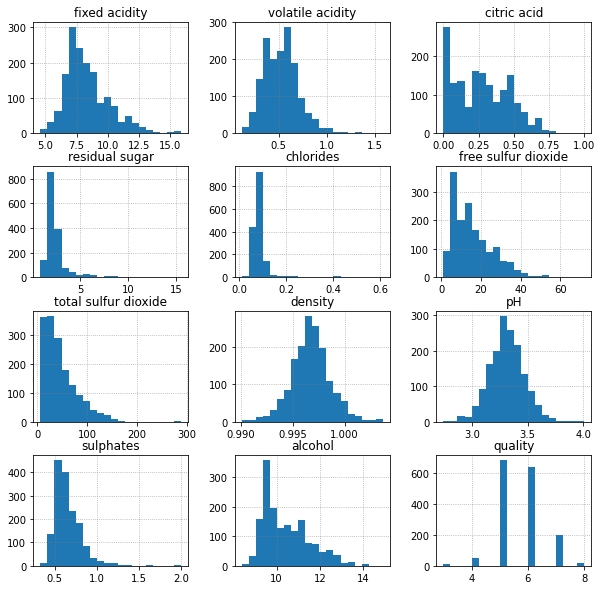

In [10]:
# review distribution of variables
df.hist(bins=20, figsize=(10, 10)) # https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/
plt.show()

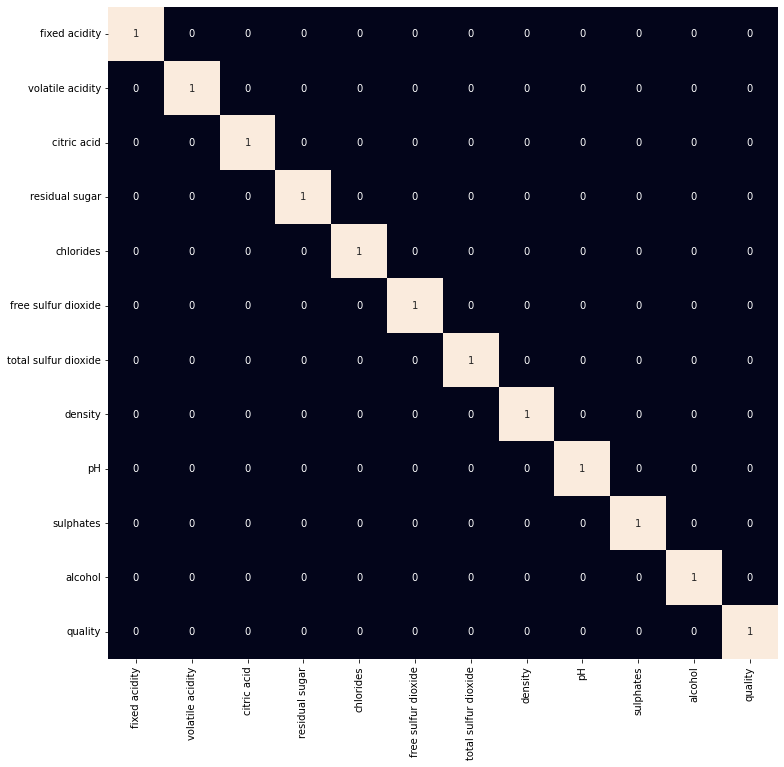

In [12]:
# Correlation matrix 
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()
# https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/

In [13]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


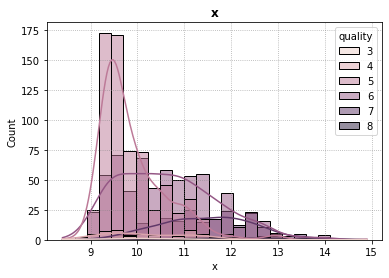

In [3]:
# check distribution of variables
plt.rc("grid", linestyle = "dotted", color = "gray", alpha = 0.7) # configure plot appearance, grids, dotted lines, colour of lines and transparency
plt.grid() # set grid lines
ax = sns.histplot(data = df, # take values from data frame
                        x = "alcohol", # set x-axis values
                         hue = "quality", # group by species to give multiple plots on one histogram
                         kde = True, # include KDE analysis
                         bins = 25,  # number of bins
                         element = "bars") # style of histogram bins
ax.set_xlabel("x", fontsize = 10) # set x-axis label
plt.title("x", weight = "bold") # set plot title
plt.show()
# code adapted from https://github.com/BreeTree/pands-project/blob/main/analysis.py
# https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/ for alternative code to review varilable distribution code

## Bibliography
1. Cortez P., Cerdeira A., Almeida F., Matos T., Reis J. (2009) Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47 (4), pp. 547-553. https://doi.org/10.1016/j.dss.2009.05.016 
2. https://www.science.org.au/curious/earth-environment/chemistry-wine-part-1 
3. Markoski MM, Garavaglia J, Oliveira A, Olivaes J, Marcadenti A. (2016) Molecular Properties of Red Wine Compounds and Cardiometabolic Benefits. Nutr Metab Insights. 2;9:51-7. https://doi.org/10.4137/NMI.S32909
4. Vilela, A. (2019) Use of Nonconventional Yeasts for Modulating Wine Acidity. Fermentation, 5, 27. https://doi.org/10.3390/fermentation5010027
